In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tempfile
from six.moves.urllib.request import urlopen
from six import BytesIO
from PIL import Image
from PIL import ImageColor
from PIL import ImageDraw
from PIL import ImageFont
from PIL import ImageOps

import time
print(tf.__version__)
print("Gpu is on")

2.3.0
Gpu is on


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def dis_img(image):
  fig = plt.figure(figsize=(20,15))
  plt.grid(False)
  plt.imshow(image)
def down_image_rs(url,new_width=256,new_height=256,display=False):
  _, filename=tempfile.mkstemp(suffix=".jpg")
  response=urlopen(url)
  image_data=response.read()
  image_data=BytesIO(image_data)
  pil_image= Image.open(image_data)
  pil_image= ImageOps.fit(pil_image,(new_width,new_height,),Image.ANTIALIAS)
  pil_image_rgb=pil_image.convert("RGB")
  pil_image_rgb.save(filename, format="JPEG",quality=90)
  print("if image is SHOW  clear ,%s" %filename)
  if display:
    dis_img(pil_image)
  return filename
def dr_b_image(image,
               ymin,
               xmin,
               ymax,
               xmax,
               color,
               font,
               thickness=4,
               display_str_list=()):
  
  drw=ImageDraw(image)
  im_width, im_height =image.size
  (left, right , top, bottom)= (xmin*im_width, xmax*im_width, ymin*im_height, ymax*im_height)
  draw.line([(left,top),(left,bottom),(right,bottom),(right,top),(left,right)],
            width=thickness,
            fill=color)
  display_str_list=[font.getsize(ds)[1] for ds in display_str_list]
  total_display_str_heights=(1+2*0.5)*sum(display_str_heights) 
  if top> total_display_str_heights:
    text_bottom=top
  else:
    text_bottom=top+total_display_str_heights
  for display_str in display_str_list[::-1]:
    text_width, text_height=fonr.getsize(display_str)
    margin= np.cell(0.05*text_bottom- text_height -2 *margin)
    draw.rectangle([(left,text_bottom - text_height - 2 *margin),
                    (left+ text_width, text_bottom)],
                   fill=color)
    draw.text((left+margin, text_bottom - text_bottom - margin),
              display_str,
              fill="black",
              font=font)
    text_bottom -=text_height -2 *margin
def draw_boxes(image,boxes,class_names,scores, max_boxes=10, min_score =0.1):
  colors= list(ImageColor.colormap.values())
  try:
    font= ImageFont.truetype("/usr/hammad.tff",25)
  except IOError:
    print("402") 
    font= ImageFont.load_default()
    for i in range (min(boxes.shape[0],max_boxes)):
      if scores [i]>=min_score:
        ymin,xmin,ymax,xmax= tuple(boxes[i])
        display_str="{}:{}%".format(class_names[i].decode("ascii"),
                                    int(100*scores[i]))  
        color= colors[hash(class_names[i]%len(colors))]
        image_pil= image.fromarray(np.uint8(image)).convert("RGB")
        dr_b_image(
            image_pil,
            ymin,
            ymax,
            xmin,
            xmax,
            color,
            font,
            display_str_list=[display_str])
        np.copyto(image,np.array(image_pill))
    return image
               


if image is SHOW  clear ,/tmp/tmpyxq36qi9.jpg


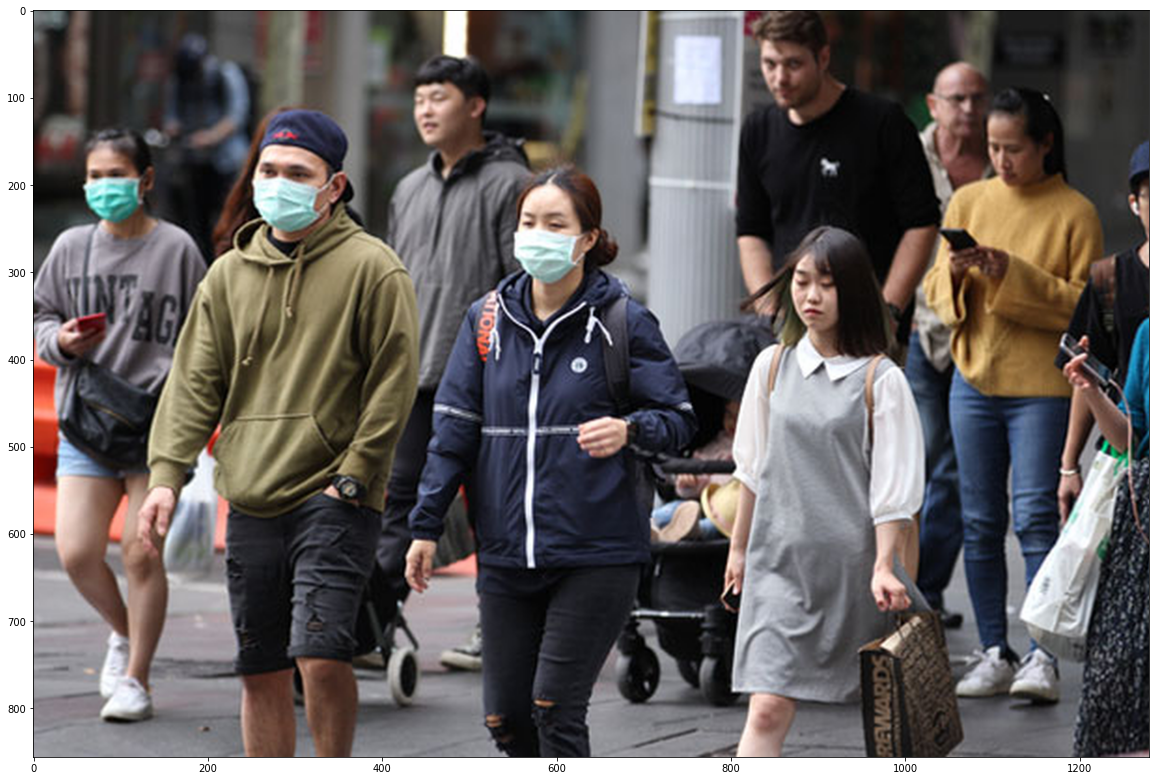

In [ ]:
image_url="https://ttgasia.2017.ttgasia.com/wp-content/uploads/sites/2/2020/03/People-are-seen-in-the-streets-of-Sydney%E2%80%99s-CBD.jpg"
down_image_path= down_image_rs(image_url,1280,856,True)

In [ ]:
module_handle = "https://tfhub.dev/google/faster_rcnn/openimages_v4/inception_resnet_v2/1"
detector = hub.load(module_handle).signatures['default']

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [ ]:
def load_img(path):
  imag= tf.io.read_file(path)
  imag = tf.image.decode_jpeg(imag,channels=3)
  return imag

In [ ]:
def run_detector(detector,path):
  imag = load_img(path)
  coverted_img = tf.image.convert_image_dtype(imag, tf.float32)[tf.newaxis,...]
  start_time = time.time()
  result = detector(coverted_img)
  end_time = time.time()

  result = {key:value.numpy() for key,value in result.items()}

  print("found %d" %len(result["detection_scores"]))
  print("time taken" , end_time-start_time)

  images_with_boxes = draw_boxes(
      imag.numpy(), result["detection_boxes"],
      result["detection_class_entities"], result["detection_scores"])
  dis_img(images_with_boxes)

In [ ]:
run_detector(detector , down_image_path)

found 100
time taken 59.72544193267822
402


TypeError: ignored